In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [13]:
df = pd.read_csv('../datasets/RIASEC_Dataset_clustered_v2.csv')
X = df.drop(columns=['major_cluster'])
y = df['major_cluster']

In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('nb', GaussianNB())
])

In [6]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(
    pipeline, X_train, y_train,
    cv=kfold, scoring='f1_macro'
)
print(f"🚀 F1_macro (cross-val, tránh leakage): {cv_scores.mean():.4f}")

🚀 F1_macro (cross-val, tránh leakage): 0.7832


In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('nb', GaussianNB())])

In [8]:
y_pred = pipeline.predict(X_test)

In [9]:
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"✅ F1_macro trên tập test: {test_f1:.4f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ F1_macro trên tập test: 0.7842

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.85      2777
          11       0.64      0.80      0.71      1190

    accuracy                           0.81      3967
   macro avg       0.77      0.81      0.78      3967
weighted avg       0.83      0.81      0.81      3967



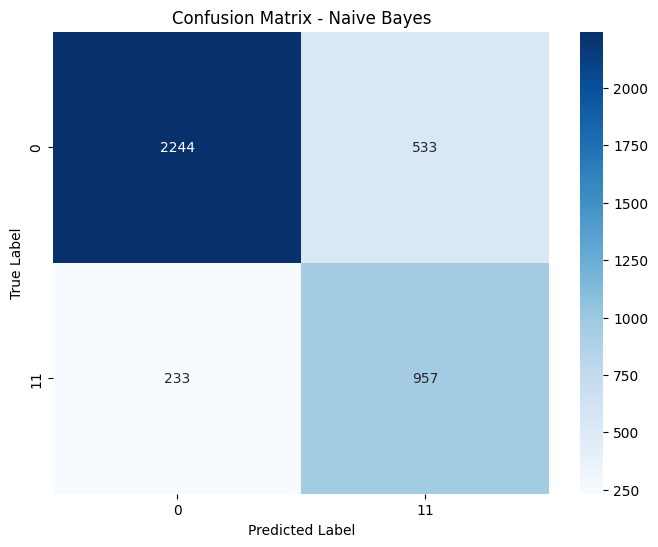

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [11]:
joblib.dump(scaler, '../models/scaler_nb_v2.joblib')
joblib.dump(pipeline, '../models/naive_bayes_pipeline_v2.joblib')
print("💾 Đã lưu scaler và mô hình vào thư mục models/")

💾 Đã lưu scaler và mô hình vào thư mục models/
